<a href="https://colab.research.google.com/github/songseunghei/DeepLearning/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
f = open("/content/sample_data/BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv","r")
coindesk_data = pd.read_csv(f,header=0)
seq = coindesk_data[['Closing Price (USD)']].to_numpy()

def seq2dataset(seq, window,horizon):
  X=[]; Y=[]
  for i in range(len(seq) - (window+horizon)+1):
    x=seq[i:(i+window)]
    y=(seq[i+window+horizon-1])
    X.append(x); Y.append(y)
  return np.array(X), np.array(Y)
w=7
h=1

X,Y = seq2dataset(seq,w,h)
print(X.shape, Y.shape)
print(X[0])
print(Y[0])
print('전체 데이터의 크기:', len(X), len(Y))

split = int(len(X) * 0.7)
x_train=X[0:split]; y_train = Y[0:split]
x_test = X[split:]; y_test=Y[split:]

print('훈련 데이터의 크기:', x_train.shape, y_train.shape)
print('테스트 데이터의 크기:', x_test.shape, y_test.shape)

(358, 7, 1) (358, 1)
[[3772.93633533]
 [3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]
 [3689.86289319]
 [3832.08088473]]
[3848.95636968]
전체 데이터의 크기: 358 358
훈련 데이터의 크기: (250, 7, 1) (250, 1)
테스트 데이터의 크기: (108, 7, 1) (108, 1)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


In [6]:
model=Sequential()
model.add(LSTM(units=128, activation='relu', input_shape= x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist = model.fit(x_train, y_train, epochs=200, batch_size=1, validation_data=(x_test,y_test),verbose=2)

Epoch 1/200
250/250 - 2s - loss: 878.3704 - mae: 878.3704 - val_loss: 460.4810 - val_mae: 460.4810 - 2s/epoch - 10ms/step
Epoch 2/200
250/250 - 1s - loss: 486.4647 - mae: 486.4647 - val_loss: 310.3003 - val_mae: 310.3003 - 697ms/epoch - 3ms/step
Epoch 3/200
250/250 - 1s - loss: 486.1721 - mae: 486.1721 - val_loss: 510.9203 - val_mae: 510.9203 - 741ms/epoch - 3ms/step
Epoch 4/200
250/250 - 1s - loss: 517.0558 - mae: 517.0558 - val_loss: 665.3638 - val_mae: 665.3638 - 777ms/epoch - 3ms/step
Epoch 5/200
250/250 - 1s - loss: 513.5770 - mae: 513.5770 - val_loss: 304.1960 - val_mae: 304.1960 - 794ms/epoch - 3ms/step
Epoch 6/200
250/250 - 1s - loss: 464.2271 - mae: 464.2271 - val_loss: 516.3624 - val_mae: 516.3624 - 735ms/epoch - 3ms/step
Epoch 7/200
250/250 - 1s - loss: 463.5495 - mae: 463.5495 - val_loss: 334.0820 - val_mae: 334.0820 - 790ms/epoch - 3ms/step
Epoch 8/200
250/250 - 1s - loss: 485.7507 - mae: 485.7507 - val_loss: 583.9602 - val_mae: 583.9602 - 1s/epoch - 4ms/step
Epoch 9/200
2

In [7]:
ev=model.evaluate(x_test, y_test, verbose=0)
print("손실함수: ",ev[0],"MAE:",ev[1])

pred=model.predict(x_test)
print("평균절대값백분율오차(MAPE)",sum(abs(y_test-pred)/y_test)/len(x_test))

손실함수:  168.93655395507812 MAE: 168.93655395507812
4/4 [==============================] - 0s 4ms/step
평균절대값백분율오차(MAPE) [0.02023928]


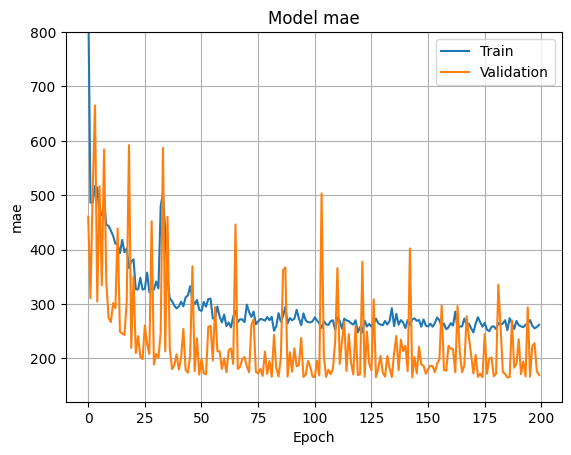

In [8]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([120,800])
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

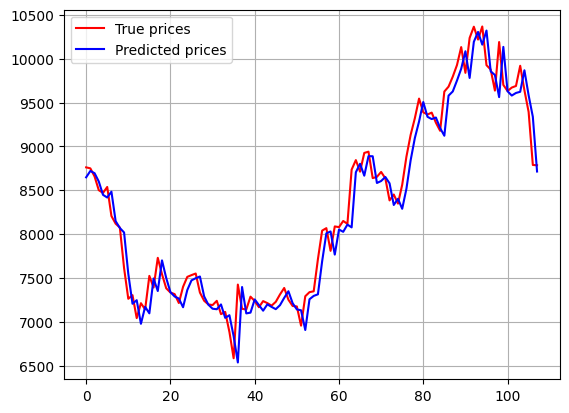

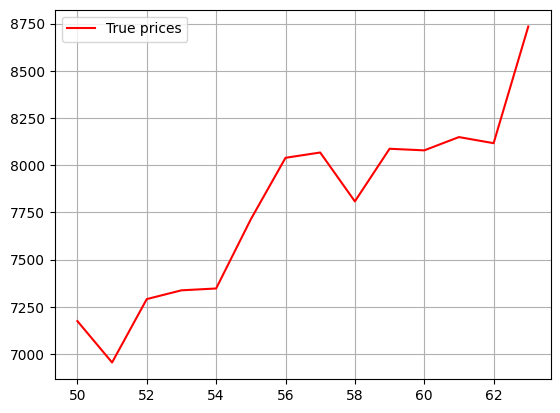

In [9]:
x_range = range(len(y_test))
plt.plot(x_range, y_test[x_range], color='red')
plt.plot(x_range,pred[x_range],color='blue')
plt.legend(['True prices', 'Predicted prices'], loc='best')
plt.grid()
plt.show()

#일부구간 확대하며 시각화
x_range = range(50,64)
plt.plot(x_range, y_test[x_range], color='red')
plt.legend(['True prices', 'Predicted prices'], loc='best')
plt.grid()
plt.show()